In [2]:
!pip install plotly

     |████████████████████████████████| 23.9 MB 110 kB/s 
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [3]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from tqdm import tqdm

In [23]:
dataset = pd.read_csv('dataset.csv')

In [24]:
dataset

,Unnamed: 0,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year_month
0,0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,2016-06
1,1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857,2016-06
2,2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000,2016-06
3,3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857,2016-06
4,4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000,2016-06
...,...,...,...,...,...,...,...,...,...,...,...
6411055,6556606,2136,4663854,f,2019-02-28,23:03,0,제주 제주시,기타 주점업,3928.571429,2019-02
6411056,6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143,2019-02
6411057,6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000,2019-02
6411058,6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571,2019-02


# EDA

1. 0, Nan 값 체크

2. 시간 별 매출
3. 지역 별 매출
4. 업종 별 매출
5. 가게 별 매출

In [5]:
# 이미 전처리를 앞 코드에서 진행했으므로 생략
# dataset['year_month'] = dataset['transacted_date'].str[0:7]

In [25]:
# 전처리 했던 dataset의 환불 정보 삭제 여부를 확인
subset = dataset[['store_id','amount','year_month']]
(subset['amount']<0).value_counts()

False    6411060
Name: amount, dtype: int64

In [26]:
# 최종 데이터 셋 형성 테스트
finalset=pd.DataFrame(data={'store_id': [],'amount' : [],'year_month' : []})
finalset

,store_id,amount,year_month


In [27]:
finalset=pd.DataFrame(data={'store_id': [],'amount' : [],'year_month' : []})

store = subset.loc[subset['store_id'] == 0]
finalset['amount'] = store.groupby(['year_month'])['amount'].agg('sum').values
finalset['year_month'] = store.groupby(['year_month'])['amount'].agg('sum').index
finalset['store_id'] = 0


for i in tqdm(subset['store_id'].unique()): # store_id의 개별 고유값에 대해서 for문 돌리기

    tempset = pd.DataFrame(data={'store_id': [],'amount' : [],'year_month' : []})

    store_ = subset.loc[subset['store_id'] == i]

    tempset['amount'] = store_.groupby(['year_month'])['amount'].agg('sum').values
    tempset['year_month'] = store_.groupby(['year_month'])['amount'].agg('sum').index
    tempset['store_id'] = i

    finalset = pd.concat([finalset,tempset], axis = 0)

finalset = finalset.reset_index(drop=True)

100%|██████████| 1967/1967 [00:27<00:00, 72.37it/s]


In [28]:
finalset

,store_id,amount,year_month
0,0,7.470000e+05,2016-06
1,0,1.005000e+06,2016-07
2,0,8.715714e+05,2016-08
3,0,8.978571e+05,2016-09
4,0,8.354286e+05,2016-10
...,...,...,...
60179,2136,2.012214e+06,2018-10
60180,2136,2.135429e+06,2018-11
60181,2136,2.427429e+06,2018-12
60182,2136,1.873643e+06,2019-01


In [29]:
finalset['datetime'] = pd.to_datetime(finalset['year_month'] + '-25', format='%Y-%m-%d')

In [30]:
finalset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60184 entries, 0 to 60183
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   store_id    60184 non-null  int64         
 1   amount      60184 non-null  float64       
 2   year_month  60184 non-null  object        
 3   datetime    60184 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


In [31]:
finalset

,store_id,amount,year_month,datetime
0,0,7.470000e+05,2016-06,2016-06-25
1,0,1.005000e+06,2016-07,2016-07-25
2,0,8.715714e+05,2016-08,2016-08-25
3,0,8.978571e+05,2016-09,2016-09-25
4,0,8.354286e+05,2016-10,2016-10-25
...,...,...,...,...
60179,2136,2.012214e+06,2018-10,2018-10-25
60180,2136,2.135429e+06,2018-11,2018-11-25
60181,2136,2.427429e+06,2018-12,2018-12-25
60182,2136,1.873643e+06,2019-01,2019-01-25


In [32]:
def store_plot(dataset, start, end):
    sns.set_style('whitegrid')
    plt.figure(figsize=(26, 6))
    for i in finalset['store_id'].unique()[start:end]:
        dataset_ = finalset.loc[(finalset['store_id'] == i), ['amount', 'datetime']]
        group = (dataset_['amount']/10000).groupby(dataset_['datetime'])
        plt.plot(group.sum().index, group.sum().values, label='store_{}'.format(i)) 
    plt.legend()
    plt.show()
    plt.tight_layout()
    print(group.sum().index)

<Figure size 640x480 with 0 Axes>

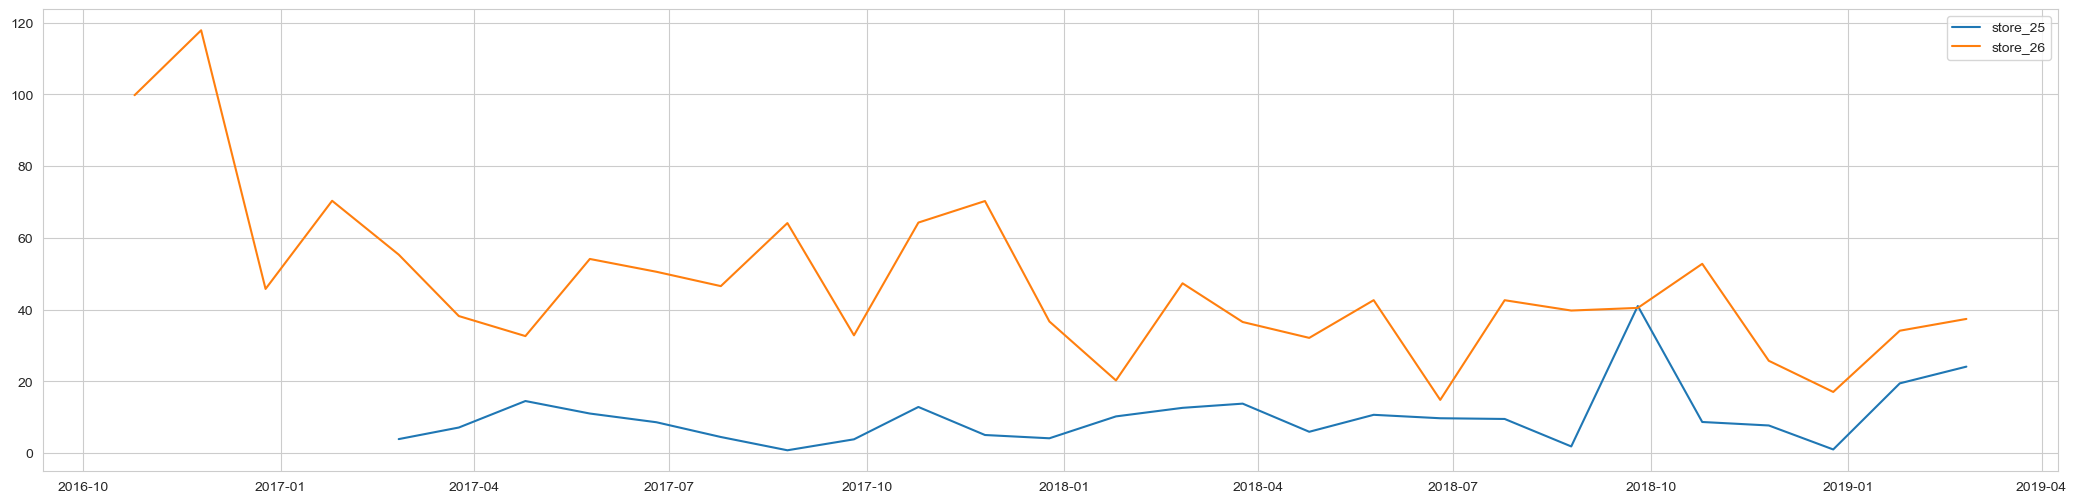

DatetimeIndex(['2016-10-25', '2016-11-25', '2016-12-25', '2017-01-25',
               '2017-02-25', '2017-03-25', '2017-04-25', '2017-05-25',
               '2017-06-25', '2017-07-25', '2017-08-25', '2017-09-25',
               '2017-10-25', '2017-11-25', '2017-12-25', '2018-01-25',
               '2018-02-25', '2018-03-25', '2018-04-25', '2018-05-25',
               '2018-06-25', '2018-07-25', '2018-08-25', '2018-09-25',
               '2018-10-25', '2018-11-25', '2018-12-25', '2019-01-25',
               '2019-02-25'],
              dtype='datetime64[ns]', name='datetime', freq=None)


In [46]:
store_plot(store_plot, 23, 25)


In [34]:
# 최종 데이터셋 저장
finalset.to_csv('finalset.csv')

# 데이터 정상성 검정

## 1. adf, kpss test 함수 형성

In [38]:
from statsmodels.tsa.stattools import adfuller, kpss

In [39]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [40]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', lags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [41]:
adf_test(finalset["amount"])

Results of Dickey-Fuller Test:
Test Statistic                   -28.707484
p-value                            0.000000
#Lags Used                        57.000000
Number of Observations Used    60126.000000
Critical Value (1%)               -3.430459
Critical Value (5%)               -2.861588
Critical Value (10%)              -2.566796
dtype: float64


In [42]:
kpss_test(finalset['amount'])

Results of KPSS Test:
Test Statistic             0.388099
p-value                    0.082285
Lags Used                134.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


<ipython-input-40-dc5217a6ae82>:3: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  kpsstest = kpss(timeseries, regression='c', lags="auto")
